In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

In [3]:
cols1 = []
for column in customer_df.columns:
    new_column_name = column.replace(' ', '_')
    cols1.append(new_column_name)
customer_df.columns = cols1
customer_df.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [4]:
customer_df['Effective_To_Date'] = pd.to_datetime(customer_df['Effective_To_Date'])
customer_df['Effective_To_Date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: Effective_To_Date, Length: 9134, dtype: datetime64[ns]

In [5]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [6]:
def grouping(row):
    categoricals = row.select_dtypes('object')
    numericals = row._get_numeric_data()
    discrete = []
    continuous = []
    for column in numericals.columns:
        if numericals[column].nunique() < 20:
            discrete.append(column)
        else:
            continuous.append(column)
    discrete1 = row[discrete]
    continuous1 = row[continuous]
    return categoricals, discrete1, continuous1

In [7]:
#The function 'grouping' is a function which groups the columns in 3 different categories
#First I group categoricals
#Then I group int into discrete because It can't have all values between the first and the second

In [8]:
categoricals, discrete, continuous = grouping(customer_df)

In [9]:
display(categoricals)
display(discrete)
display(continuous)

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,Number_of_Open_Complaints,Number_of_Policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [10]:
#I can delete de customer id column because it's useless

In [11]:
categoricals = categoricals.drop(['Customer'], axis=1)
categoricals

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [12]:
for column in categoricals:
    print(categoricals[column].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [13]:
for i in range(len(categoricals['Vehicle_Size'])):
    if categoricals['Vehicle_Size'][i] == 'Medsize':
        categoricals['Vehicle_Size'][i] = 'Midsize'
categoricals['Vehicle_Size']

0       Midsize
1       Midsize
2       Midsize
3       Midsize
4       Midsize
         ...   
9129    Midsize
9130    Midsize
9131    Midsize
9132      Large
9133    Midsize
Name: Vehicle_Size, Length: 9134, dtype: object

In [14]:
# LAB 2

In [15]:
numericals = pd.concat([discrete, continuous], axis= 1)

In [16]:
correlations_matrix = numericals.corr()
correlations_matrix

,Number_of_Open_Complaints,Number_of_Policies,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
Number_of_Open_Complaints,1.000000,0.001498,-0.036343,0.006408,-0.013122,0.005354,-0.001158,-0.014241
Number_of_Policies,0.001498,1.000000,0.021955,-0.008656,-0.011233,0.009136,-0.013333,-0.002354
Customer_Lifetime_Value,-0.036343,0.021955,1.000000,0.024366,0.396262,0.011517,0.009418,0.226451
Income,0.006408,-0.008656,0.024366,1.000000,-0.016665,-0.026715,-0.000875,-0.355254
Monthly_Premium_Auto,-0.013122,-0.011233,0.396262,-0.016665,1.000000,0.005026,0.020257,0.632017
Months_Since_Last_Claim,0.005354,0.009136,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.007563
Months_Since_Policy_Inception,-0.001158,-0.013333,0.009418,-0.000875,0.020257,-0.042959,1.000000,0.003335
Total_Claim_Amount,-0.014241,-0.002354,0.226451,-0.355254,0.632017,0.007563,0.003335,1.000000


In [17]:
# They aren't correlative at all

In [18]:
def discrete_plots(row):
    for column in row.columns:
        sns.displot(row[column])
        plots = plt.show() 
    return plots

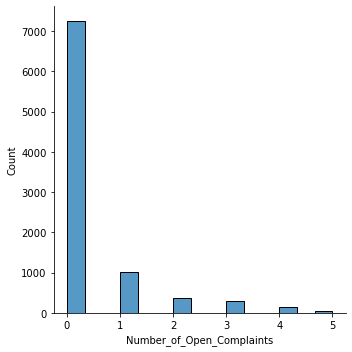

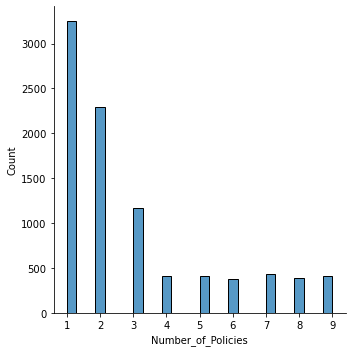

In [19]:
discrete_plots(discrete)

In [20]:
def continuous_plots(row):
    for column in row.columns:
        row[[column]].boxplot()
        plots = plt.show()
    return plots

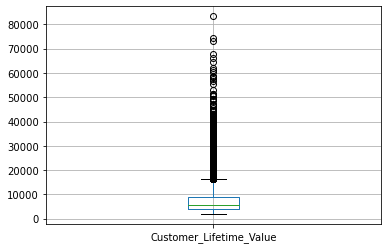

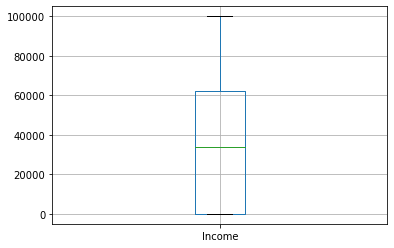

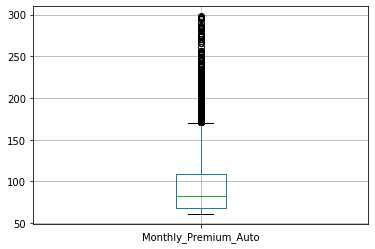

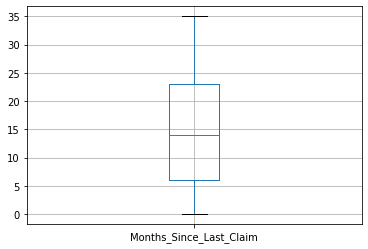

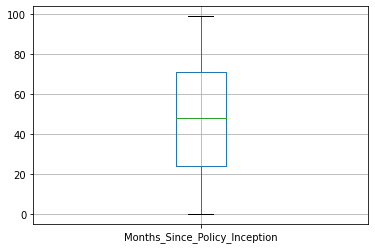

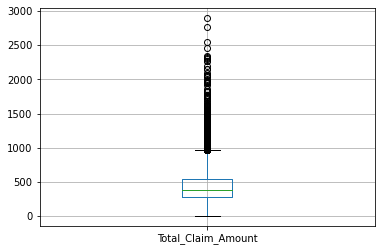

In [21]:
continuous_plots(continuous)

In [22]:
# I can see a lot of ouliers in some of the continuous variables

In [23]:
# I can use log transformation to reduce the number of outliers

In [24]:
def log_transfom_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [25]:
outliers = continuous[['Customer_Lifetime_Value','Monthly_Premium_Auto', 'Total_Claim_Amount']]

In [26]:
for column in outliers:
    pd.Series(continuous[column].apply(log_transfom_clean))

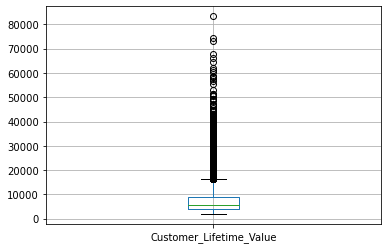

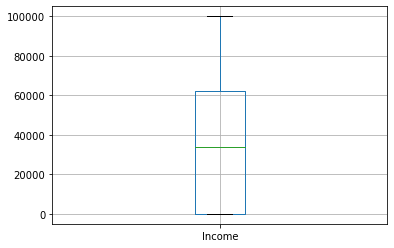

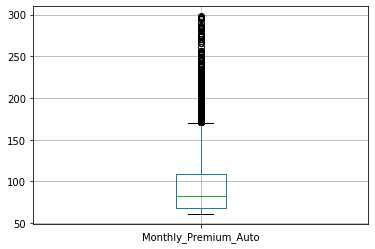

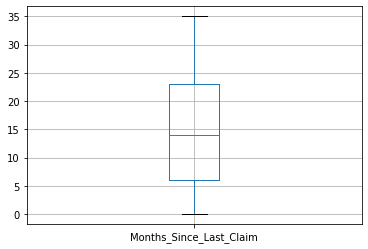

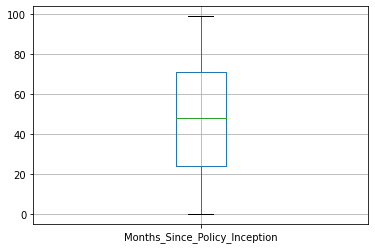

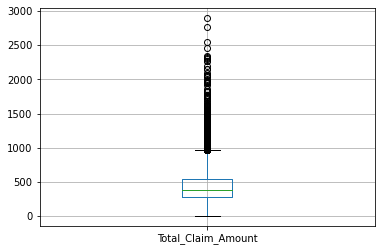

In [27]:
continuous_plots(continuous)

In [28]:
def categorical_plots(row):
    f , axes = plt.subplots(int(categoricals.shape[1]/2),2, figsize =(30,50))
    for i, col in enumerate(categoricals):
        sns.barplot(x = categoricals[col].value_counts().index,
                y = categoricals[col].value_counts(),
                ax = axes[int(i/2)][int(i)%2])
        axes[int(i/2)][int(i)%2].set_title(col,fontsize = 10)
        axes[int(i/2)][int(i)%2].set_ylabel('')
    return axes

array([[<AxesSubplot:title={'center':'State'}>,
        <AxesSubplot:title={'center':'Response'}>],
       [<AxesSubplot:title={'center':'Coverage'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmploymentStatus'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Location_Code'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Policy_Type'}>,
        <AxesSubplot:title={'center':'Policy'}>],
       [<AxesSubplot:title={'center':'Renew_Offer_Type'}>,
        <AxesSubplot:title={'center':'Sales_Channel'}>],
       [<AxesSubplot:title={'center':'Vehicle_Class'}>,
        <AxesSubplot:title={'center':'Vehicle_Size'}>]], dtype=object)

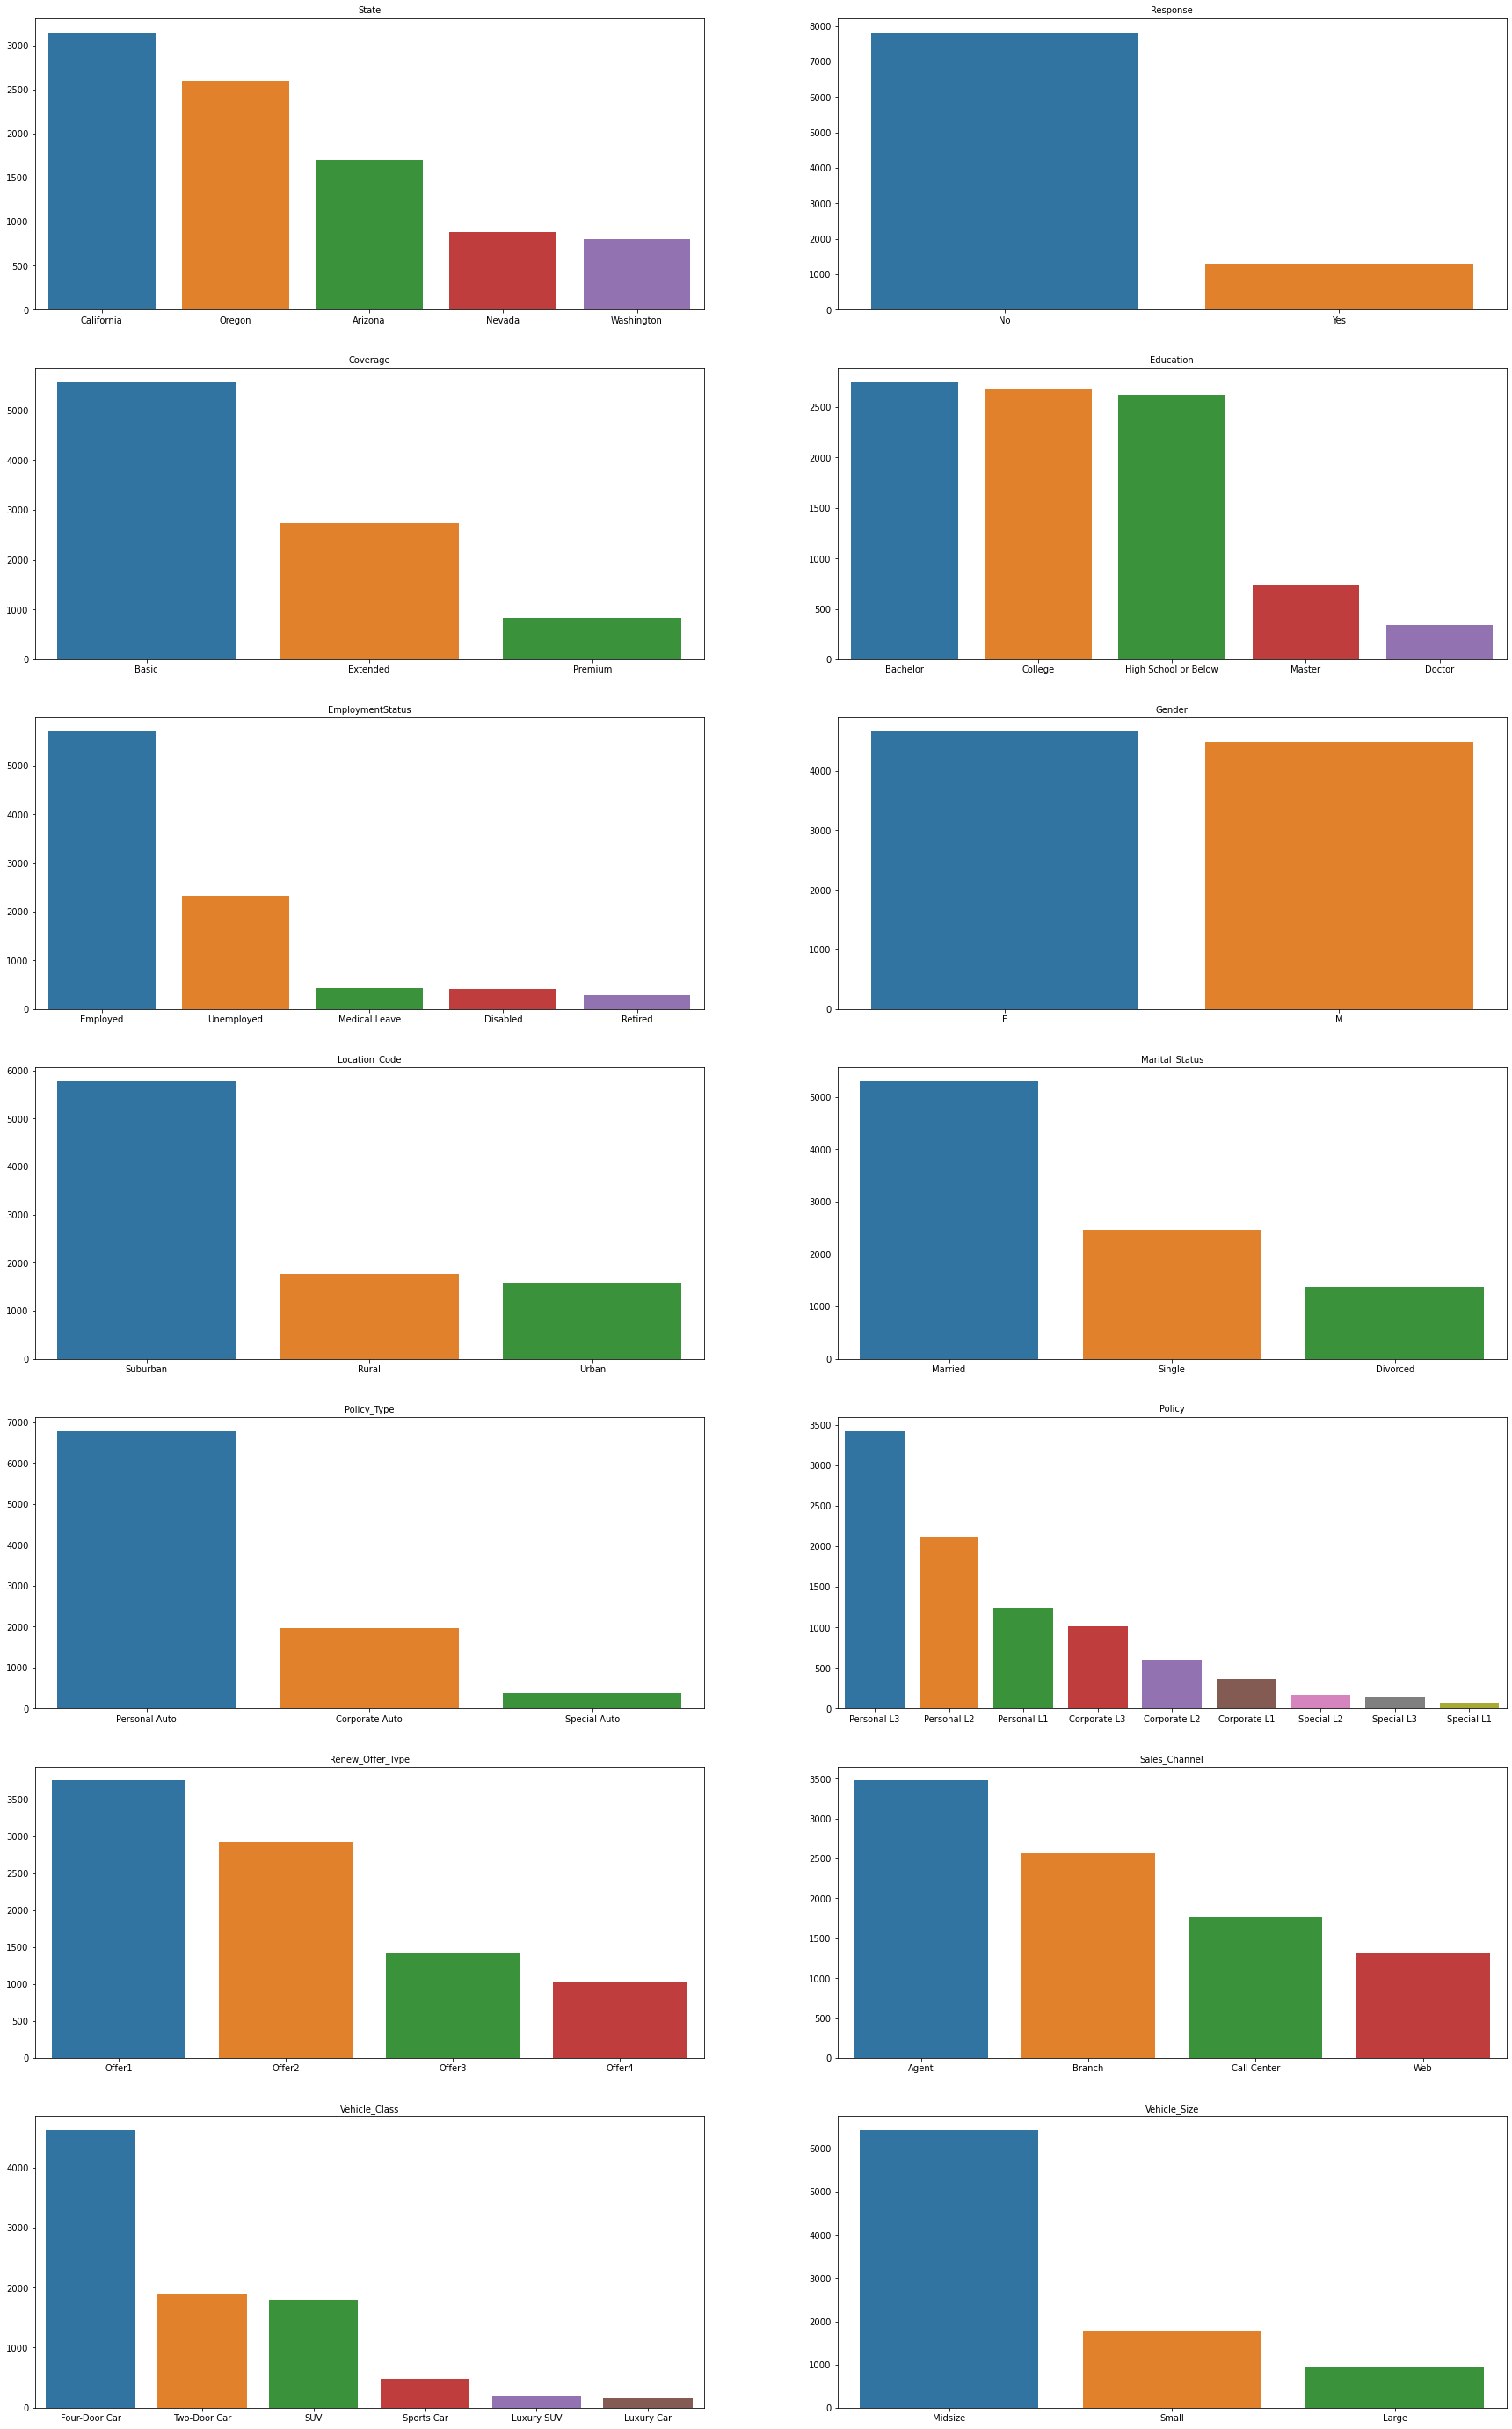

In [29]:
categorical_plots(categoricals)

In [30]:
# Most of categorical are or unbalanced or they have many variables inside, I must change it

In [31]:
def cleaning_categorical(row):
    # In State i'm going to group Nev y Wash into 'Other'
    row['State'] = row['State'].replace(['Nevada','Washington'], 'Other')
    # In EmploymentStatus I can create a new group 'Not Active'
    row['EmploymentStatus'] = row['EmploymentStatus'].replace(['Medical Leave','Disabled', 'Retired'], 'Not_Active')
    # In Policy I can group in L1, L2, L3
    for i in range(len(row['Policy'])):
        if row['Policy'][i].count('L1') >= 1:
            row['Policy'][i] = 'L1'
        elif row['Policy'][i].count('L2') >= 1:
            row['Policy'][i] = 'L2'
        elif row['Policy'][i].count('L3') >= 1:
            row['Policy'][i] = 'L3'
    # I Vehicle Class I can group the last 3 in one called Other_types
    row['Vehicle_Class'] = row['Vehicle_Class'].replace(['Luxury Car','Luxury SUV', 'Sports Car'], 'Other_types')
    return row

In [32]:
clean_categorical = cleaning_categorical(categoricals)

array([[<AxesSubplot:title={'center':'State'}>,
        <AxesSubplot:title={'center':'Response'}>],
       [<AxesSubplot:title={'center':'Coverage'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmploymentStatus'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Location_Code'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Policy_Type'}>,
        <AxesSubplot:title={'center':'Policy'}>],
       [<AxesSubplot:title={'center':'Renew_Offer_Type'}>,
        <AxesSubplot:title={'center':'Sales_Channel'}>],
       [<AxesSubplot:title={'center':'Vehicle_Class'}>,
        <AxesSubplot:title={'center':'Vehicle_Size'}>]], dtype=object)

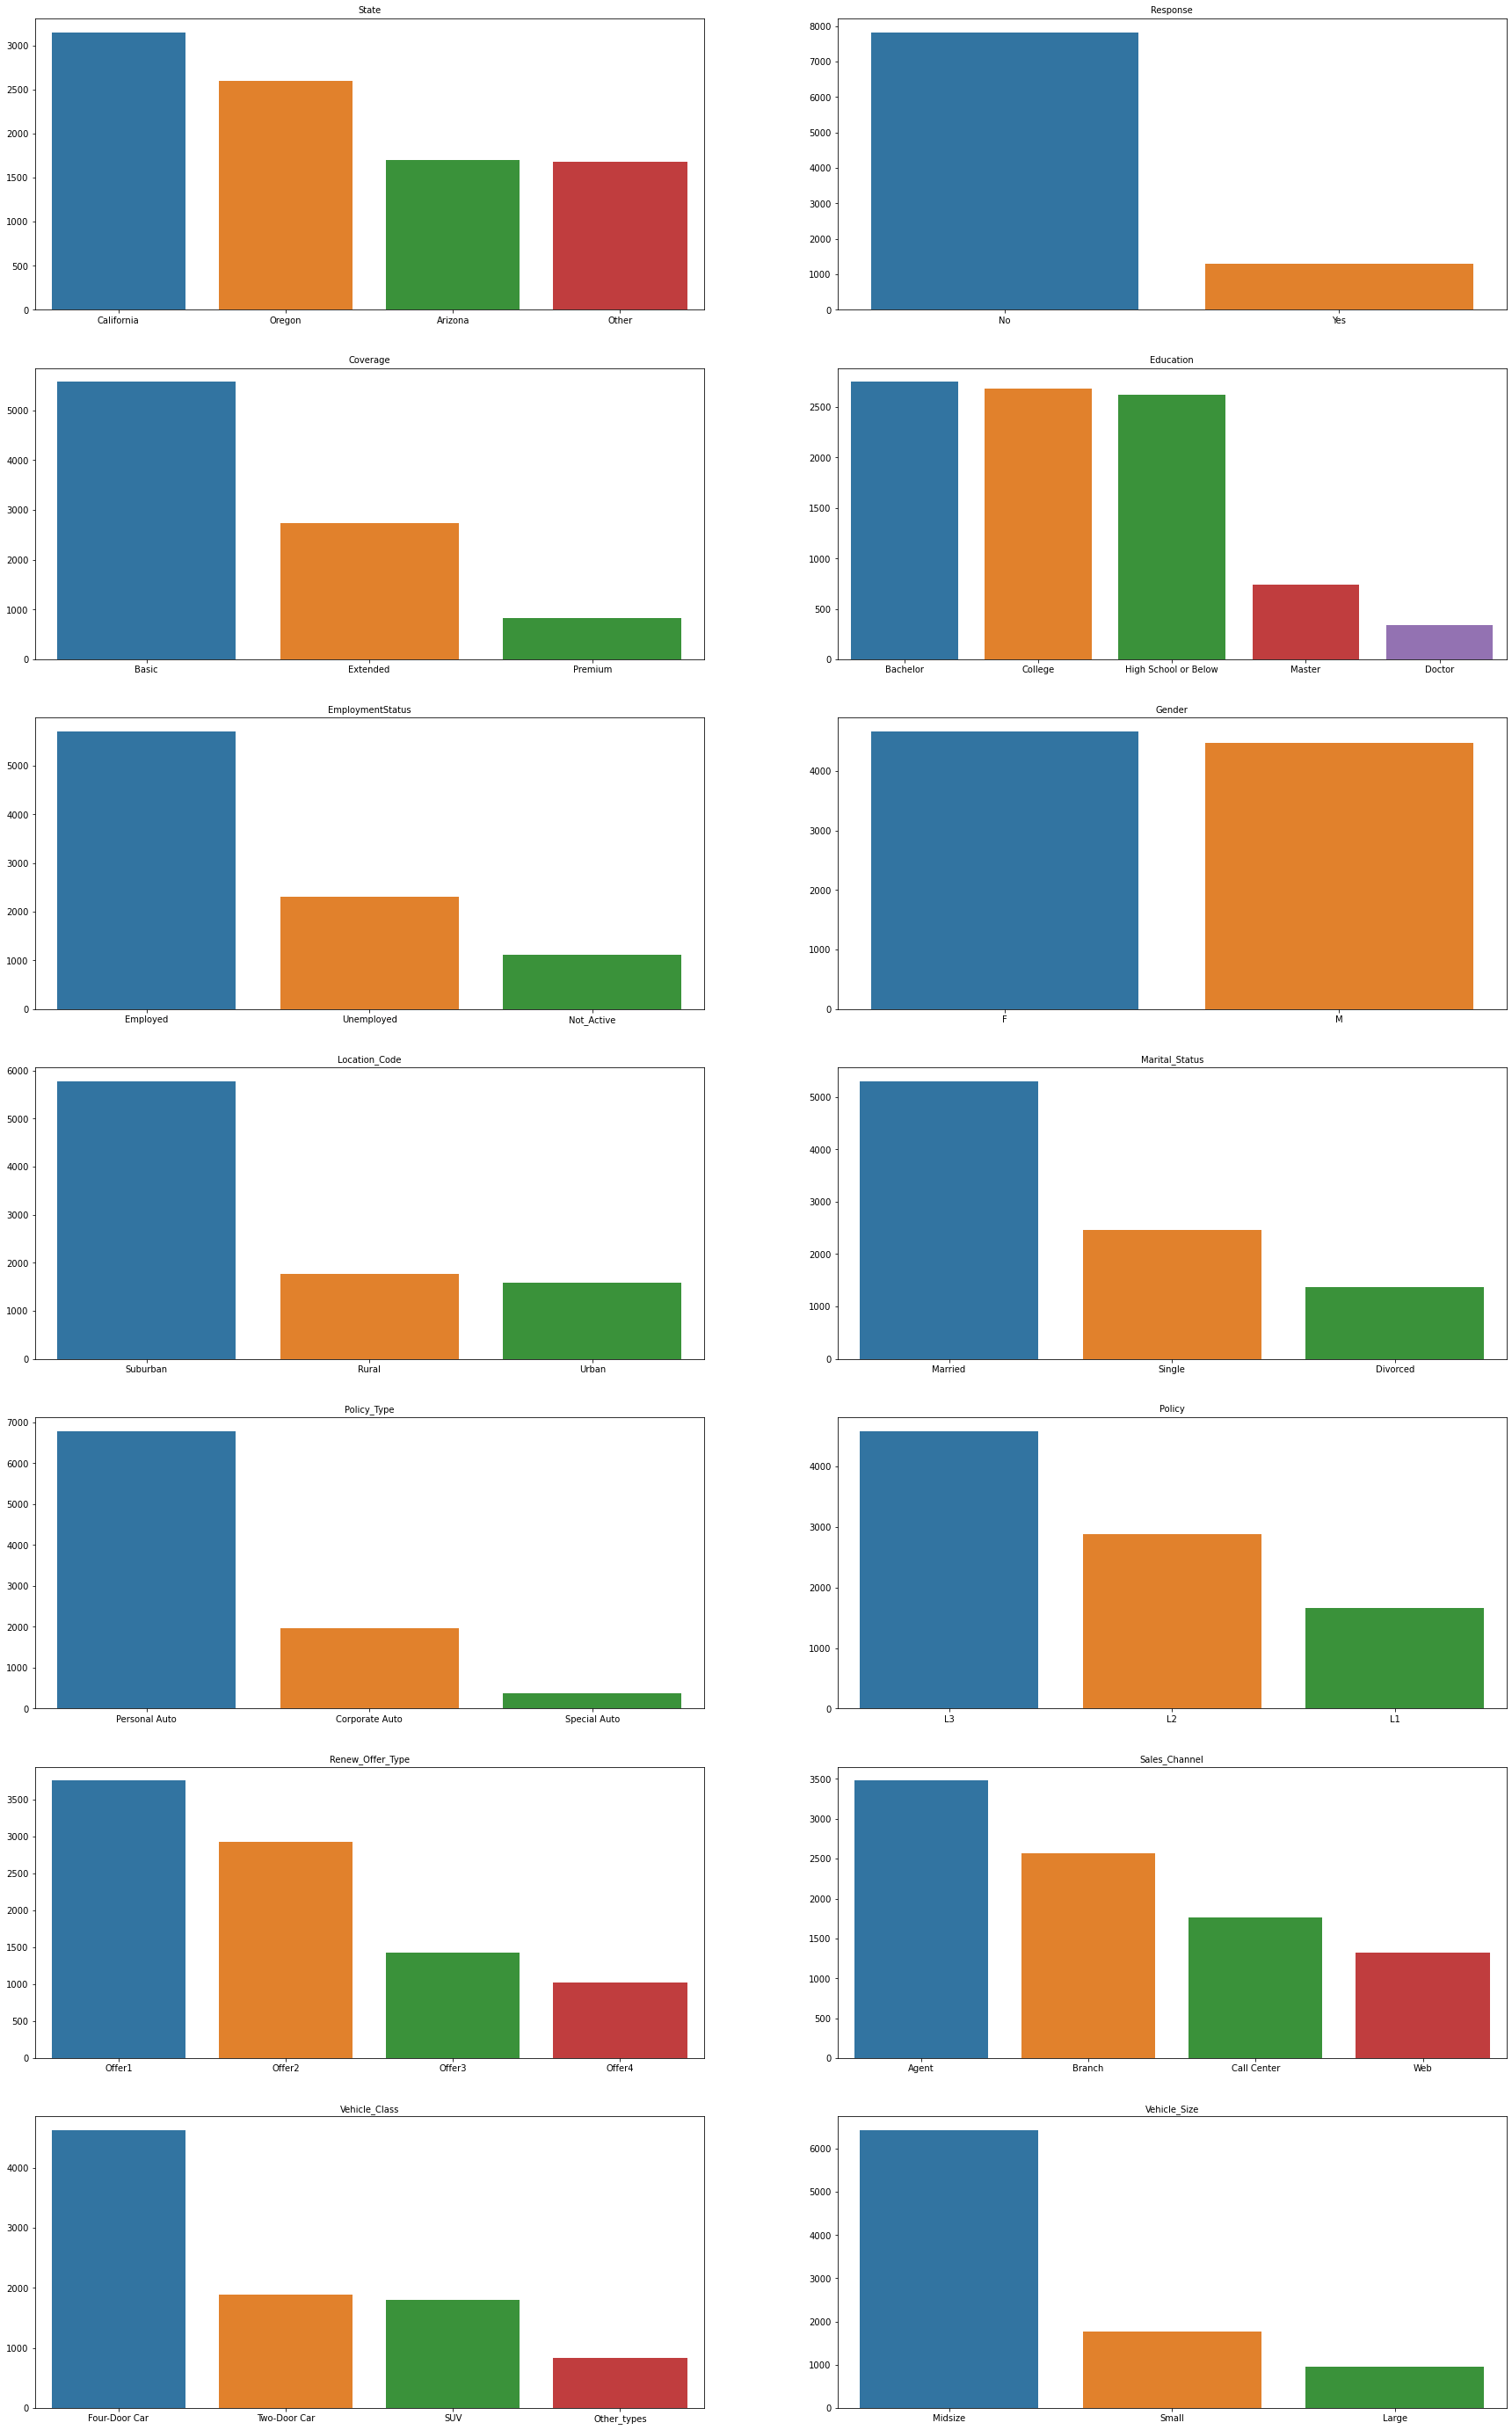

In [33]:
categorical_plots(clean_categorical)

In [34]:
# And the same for other numerical variables, there are many I can group or change to be better agroupped

In [35]:
discrete

,Number_of_Open_Complaints,Number_of_Policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [36]:
display(discrete['Number_of_Open_Complaints'].value_counts())
display(discrete['Number_of_Policies'].value_counts())

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number_of_Open_Complaints, dtype: int64

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number_of_Policies, dtype: int64

In [37]:
# I can group the first in open or not opend, and the second in 1, 2, 3, 4, or more than 4

In [38]:
def cleaning_discrete(row):
    row.rename(columns={'Number_of_Open_Complaints':'2'}, inplace=True)
    row['Open_Complaints'] = row['2']
    row['Open_Complaints'] = str(row['Open_Complaints'])
    for i in range(len(row['2'])):
        if row['2'][i] > 0:
            row['Open_Complaints'][i] = 'Open Complains'
        else:
            row['Open_Complaints'][i] = 'Not Open Complains'
    row.rename(columns={'Number_of_Policies':'1'}, inplace=True)
    row['Number_of_Policies'] = row['1']
    row['Number_of_Policies'] = str(row['Number_of_Policies'])
    for i in range(len(row['Number_of_Policies'])):
        if row['1'][i] >= 4:
            row['Number_of_Policies'][i] = '4+'
        else:
            row['Number_of_Policies'][i] = str(row['1'][i])
    row = row.drop(['1','2'], axis =1)
    return row

In [39]:
clean_discrete = cleaning_discrete(discrete)
clean_discrete

C:\Users\Propietario\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-38-5517cf47b386>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Open_Complaints'] = row['2']
<ipython-input-38-5517cf47b386>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,Open_Complaints,Number_of_Policies
0,Not Open Complains,1
1,Not Open Complains,4+
2,Not Open Complains,2
3,Not Open Complains,4+
4,Not Open Complains,1
...,...,...
9129,Not Open Complains,2
9130,Not Open Complains,1
9131,Open Complains,2
9132,Not Open Complains,3


In [40]:
display(clean_discrete['Open_Complaints'].value_counts())
display(clean_discrete['Number_of_Policies'].value_counts())

Not Open Complains    7252
Open Complains        1882
Name: Open_Complaints, dtype: int64

1     3251
4+    2421
2     2294
3     1168
Name: Number_of_Policies, dtype: int64

In [41]:
# LAB FEATURE EXTRACTION

In [42]:
categoricals

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Midsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Midsize
2,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Midsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Midsize
4,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Midsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Midsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Midsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Midsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


In [43]:
clean_categorical

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Midsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Midsize
2,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Midsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Midsize
4,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Midsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Midsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Midsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Midsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


array([[<AxesSubplot:title={'center':'State'}>,
        <AxesSubplot:title={'center':'Response'}>],
       [<AxesSubplot:title={'center':'Coverage'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmploymentStatus'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Location_Code'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Policy_Type'}>,
        <AxesSubplot:title={'center':'Policy'}>],
       [<AxesSubplot:title={'center':'Renew_Offer_Type'}>,
        <AxesSubplot:title={'center':'Sales_Channel'}>],
       [<AxesSubplot:title={'center':'Vehicle_Class'}>,
        <AxesSubplot:title={'center':'Vehicle_Size'}>]], dtype=object)

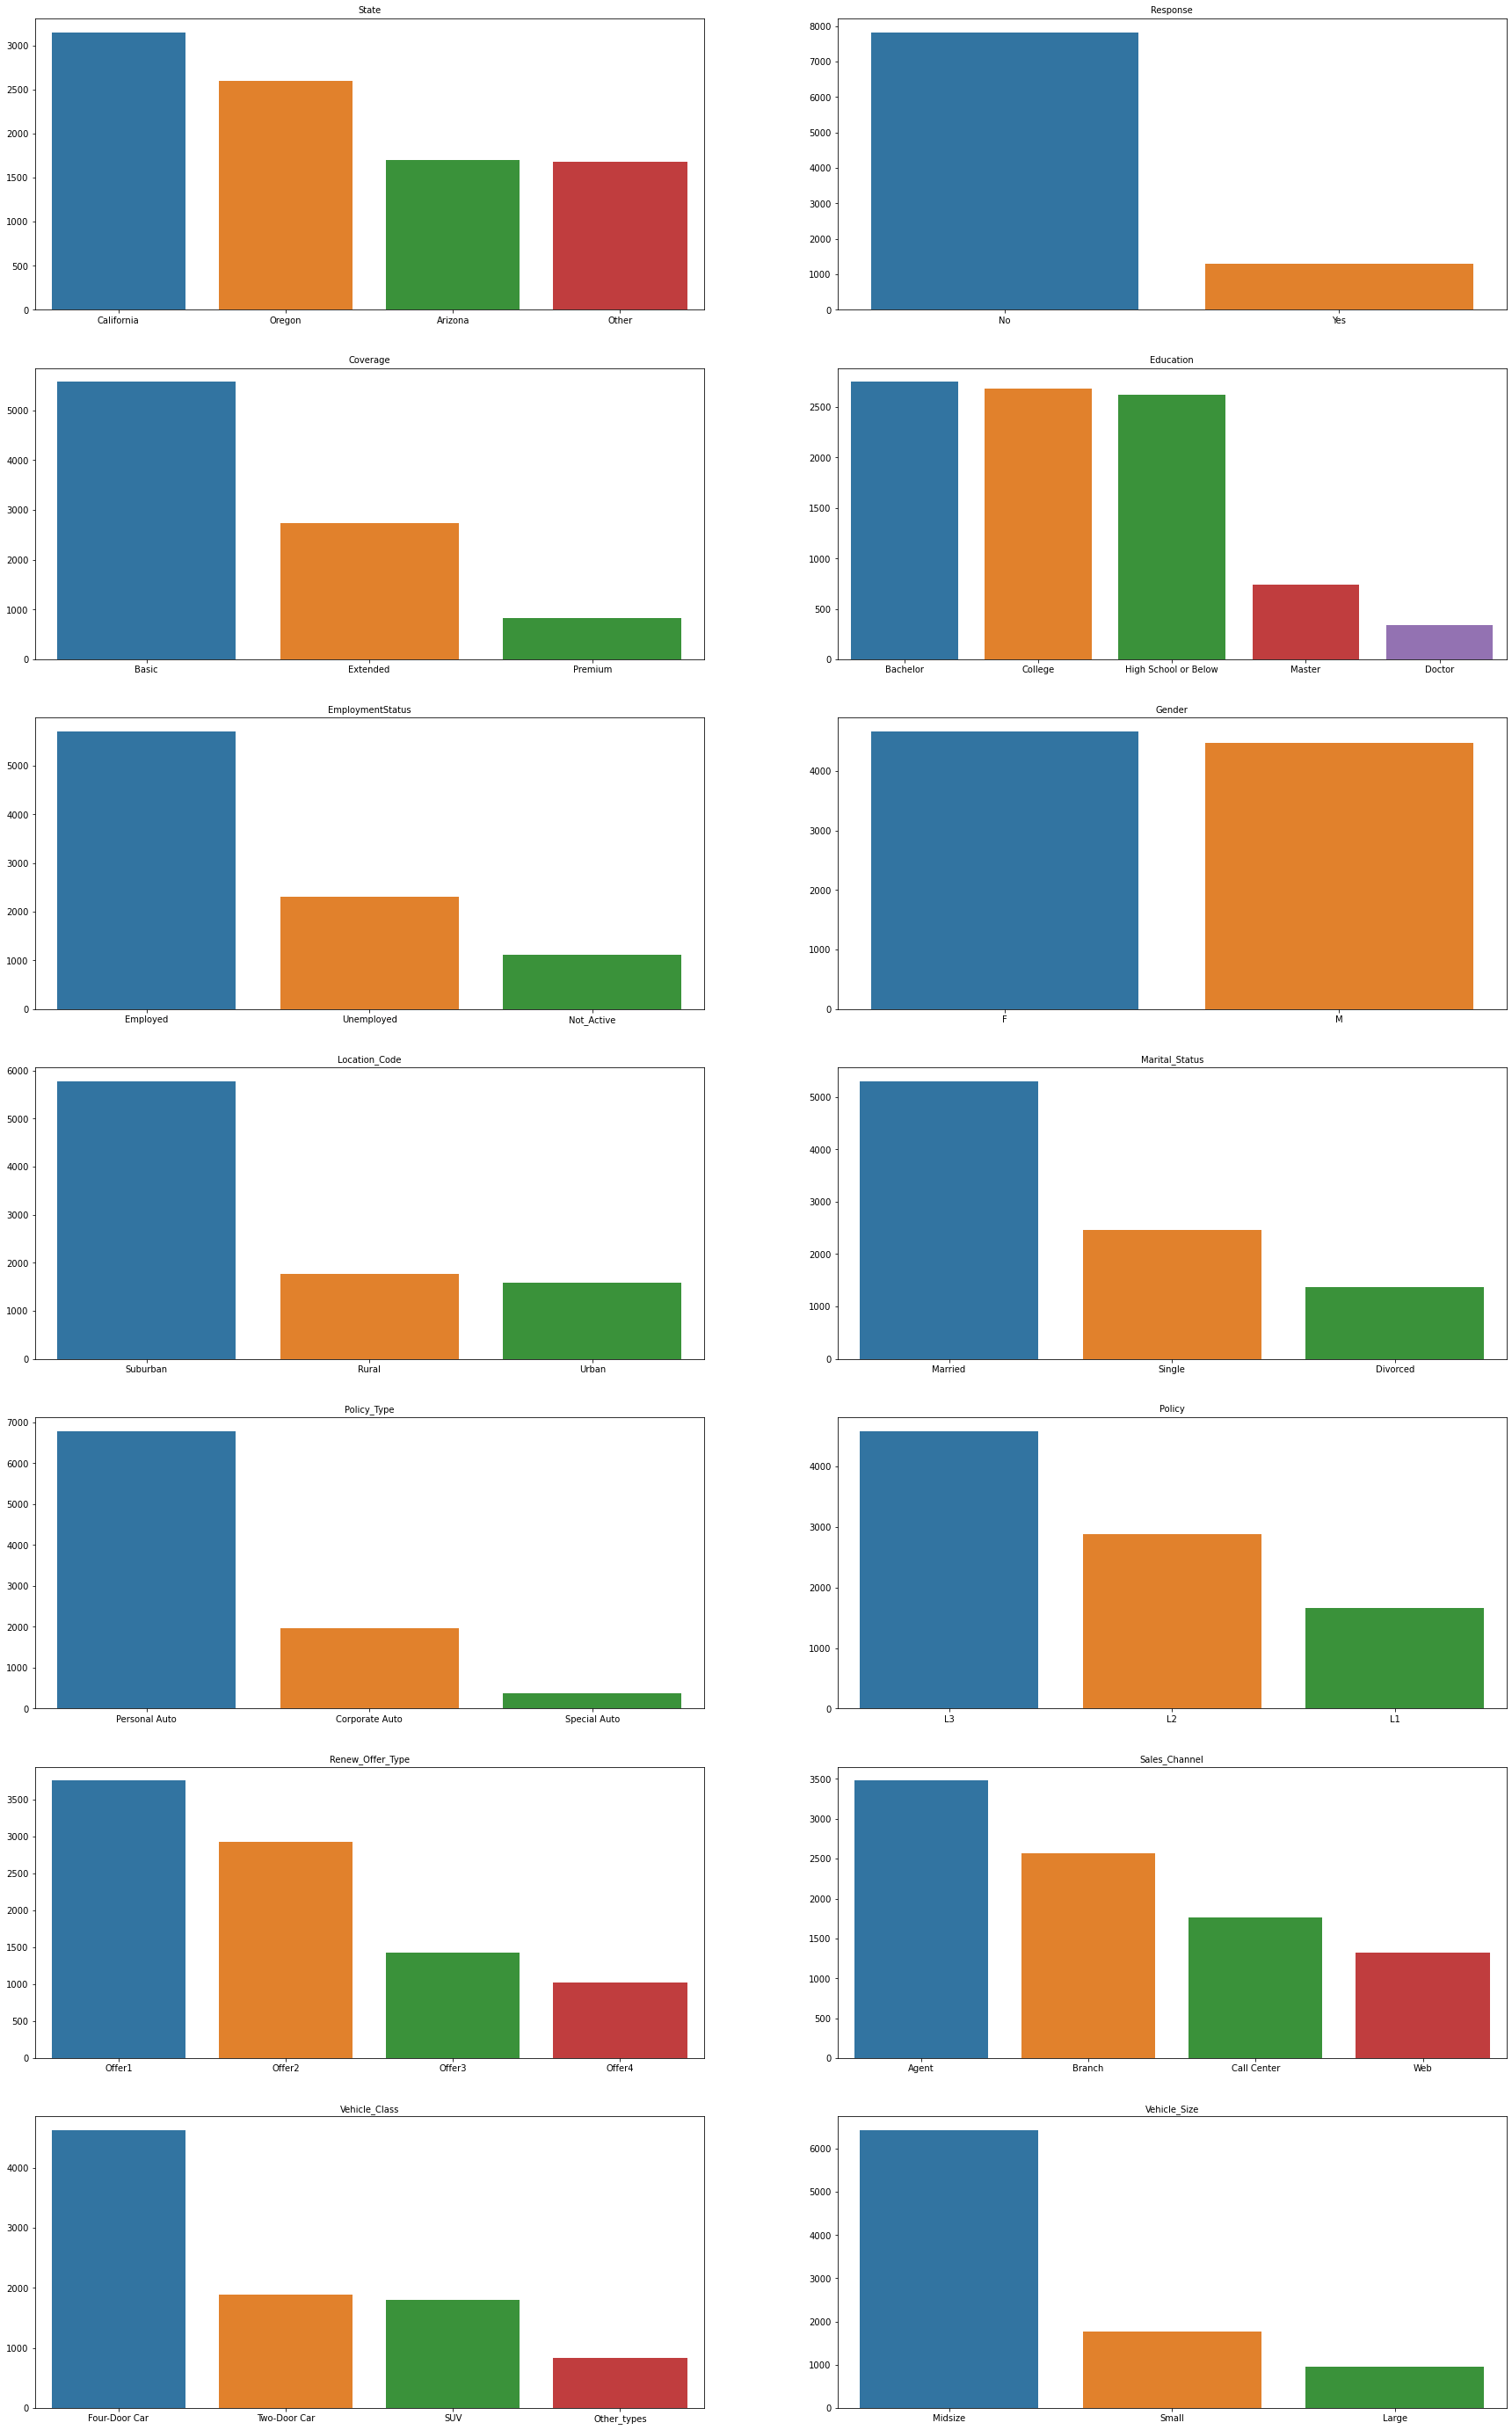

In [44]:
categorical_plots(clean_categorical)

In [45]:
# I can see some variables with similar distribution, and a lot of variables very unbalanced.

In [46]:
corr_matrix1 = numericals.corr()
corr_matrix1

,Number_of_Open_Complaints,Number_of_Policies,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
Number_of_Open_Complaints,1.000000,0.001498,-0.036343,0.006408,-0.013122,0.005354,-0.001158,-0.014241
Number_of_Policies,0.001498,1.000000,0.021955,-0.008656,-0.011233,0.009136,-0.013333,-0.002354
Customer_Lifetime_Value,-0.036343,0.021955,1.000000,0.024366,0.396262,0.011517,0.009418,0.226451
Income,0.006408,-0.008656,0.024366,1.000000,-0.016665,-0.026715,-0.000875,-0.355254
Monthly_Premium_Auto,-0.013122,-0.011233,0.396262,-0.016665,1.000000,0.005026,0.020257,0.632017
Months_Since_Last_Claim,0.005354,0.009136,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.007563
Months_Since_Policy_Inception,-0.001158,-0.013333,0.009418,-0.000875,0.020257,-0.042959,1.000000,0.003335
Total_Claim_Amount,-0.014241,-0.002354,0.226451,-0.355254,0.632017,0.007563,0.003335,1.000000


In [47]:
corr_matrix2 = discrete.corr()
corr_matrix2

,2,1
2,1.000000,0.001498
1,0.001498,1.000000


In [48]:
# Only looking the corr_matrix I can't see anything redundant

In [49]:
continuous

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [50]:
time = pd.DataFrame()
time['day'] = customer_df['Effective_To_Date'].dt.day
time['week'] = customer_df['Effective_To_Date'].dt.week
time['month'] = customer_df['Effective_To_Date'].dt.month
time['target'] = customer_df['Total_Claim_Amount']

<ipython-input-50-39b2c3743e24>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  time['week'] = customer_df['Effective_To_Date'].dt.week


<AxesSubplot:xlabel='day', ylabel='target'>

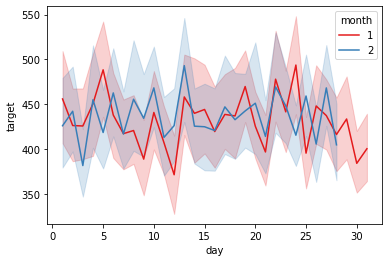

In [51]:
sns.lineplot(x = time.day, y = time.target, hue = time.month, palette = "Set1")

<AxesSubplot:xlabel='week', ylabel='target'>

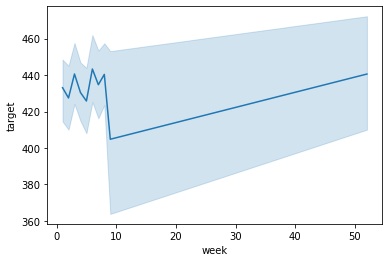

In [52]:
sns.lineplot(x = time.week, y = time.target)

<AxesSubplot:xlabel='day', ylabel='target'>

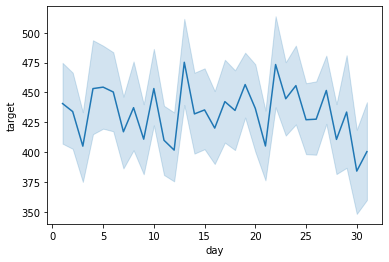

In [53]:
sns.lineplot(x = time.day, y = time.target)

<AxesSubplot:xlabel='month', ylabel='target'>

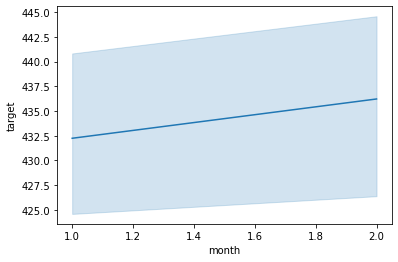

In [54]:
sns.lineplot(x = time.month, y = time.target)

In [55]:
# LAB DATA CLEANING AND WRANGLING

In [56]:
continuous

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [57]:
outliers

,Customer_Lifetime_Value,Monthly_Premium_Auto,Total_Claim_Amount
0,2763.519279,69,384.811147
1,6979.535903,94,1131.464935
2,12887.431650,108,566.472247
3,7645.861827,106,529.881344
4,2813.692575,73,138.130879
...,...,...,...
9129,23405.987980,73,198.234764
9130,3096.511217,79,379.200000
9131,8163.890428,85,790.784983
9132,7524.442436,96,691.200000


In [58]:
def removing_outliers(row):
    outliers = continuous[['Customer_Lifetime_Value','Monthly_Premium_Auto', 'Total_Claim_Amount']]
    for column in outliers.columns:
        iqr_total_claim_amount = np.percentile(row[column],75) - np.percentile(row[column],25)
        upper_limit_total_claim_amount= np.percentile(row[column],75) + 2*iqr_total_claim_amount
        row = row[row[column] < upper_limit_total_claim_amount]
    row = row.dropna()
    return row

In [59]:
continuous_cleaned = removing_outliers(customer_df)
continuous_cleaned

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [60]:
continuous_cleaned = continuous_cleaned.drop(['Customer'], axis = 1)
continuous_cleaned = continuous_cleaned.reset_index(drop = True)

In [61]:
continuous_cleaned.isna().sum()

State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [62]:
clean_categoricals, discrete1, clean_continuous = grouping(continuous_cleaned)

In [63]:
display(clean_categoricals)
display(discrete1)
display(clean_continuous)

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
2,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
3,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
4,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
8121,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
8122,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
8123,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,Number_of_Open_Complaints,Number_of_Policies
0,0,1
1,0,2
2,0,7
3,0,1
4,0,2
...,...,...
8120,0,1
8121,0,1
8122,3,2
8123,0,3


,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
0,2763.519279,56274,69,32,5,384.811147
1,12887.431650,48767,108,18,38,566.472247
2,7645.861827,0,106,18,65,529.881344
3,2813.692575,43836,73,12,44,138.130879
4,8256.297800,62902,69,14,94,159.383042
...,...,...,...,...,...,...
8120,4100.398533,47761,104,16,58,541.282007
8121,3096.511217,21604,79,14,28,379.200000
8122,8163.890428,0,85,9,37,790.784983
8123,7524.442436,21941,96,34,3,691.200000


In [64]:
for i in range(len(clean_categoricals['Vehicle_Size'])):
    if clean_categoricals['Vehicle_Size'][i] == 'Medsize':
        clean_categoricals['Vehicle_Size'][i] = 'Midsize'
clean_categoricals['Vehicle_Size']

C:\Users\Propietario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0       Midsize
1       Midsize
2       Midsize
3       Midsize
4       Midsize
         ...   
8120      Large
8121    Midsize
8122    Midsize
8123      Large
8124    Midsize
Name: Vehicle_Size, Length: 8125, dtype: object

In [65]:
clean_categoricals1 = cleaning_categorical(clean_categoricals)
clean_categoricals1

<ipython-input-31-ad241a0de2f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['State'] = row['State'].replace(['Nevada','Washington'], 'Other')
<ipython-input-31-ad241a0de2f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['EmploymentStatus'] = row['EmploymentStatus'].replace(['Medical Leave','Disabled', 'Retired'], 'Not_Active')
<ipython-input-65-c488536a9b4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Midsize
1,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Midsize
2,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Midsize
3,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Midsize
4,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,L3,Offer2,Web,Two-Door Car,Midsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,L2,Offer1,Branch,Four-Door Car,Large
8121,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Midsize
8122,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Midsize
8123,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


In [66]:
clean_discrete1 = cleaning_discrete(discrete1)
clean_discrete1

C:\Users\Propietario\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-38-5517cf47b386>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Open_Complaints'] = row['2']
<ipython-input-38-5517cf47b386>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,Open_Complaints,Number_of_Policies
0,Not Open Complains,1
1,Not Open Complains,2
2,Not Open Complains,4+
3,Not Open Complains,1
4,Not Open Complains,2
...,...,...
8120,Not Open Complains,1
8121,Not Open Complains,1
8122,Open Complains,2
8123,Not Open Complains,3


In [67]:
# Now discrete varibles are categorical

In [68]:
new_categorical = pd.concat([clean_categoricals1, clean_discrete1], axis = 1)

In [69]:
# There is a column which format it's not included in any of this groups and can contain usefull nformation.

In [70]:
time1 = pd.DataFrame()
time1['day'] = continuous_cleaned['Effective_To_Date'].dt.day
time1['week'] = continuous_cleaned['Effective_To_Date'].dt.week
time1['month'] = continuous_cleaned['Effective_To_Date'].dt.month

<ipython-input-70-09891e76e440>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  time1['week'] = continuous_cleaned['Effective_To_Date'].dt.week


In [71]:
numerical_variables = pd.concat([clean_continuous, time1], axis = 1)

In [72]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numerical_variables)
x_normalized = transformer.transform(numerical_variables)
print(x_normalized.shape)
numnor = pd.DataFrame(x_normalized, columns=numerical_variables.columns)
numnor

(8125, 9)


,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount,day,week,month
0,0.050930,0.562847,0.063492,0.914286,0.050505,0.363116,0.766667,0.137255,1.0
1,0.646658,0.487763,0.373016,0.514286,0.383838,0.534580,0.600000,0.117647,1.0
2,0.338225,0.000000,0.357143,0.514286,0.656566,0.500043,0.633333,0.039216,0.0
3,0.053882,0.438443,0.095238,0.342857,0.444444,0.130283,0.066667,0.078431,1.0
4,0.374145,0.629140,0.063492,0.400000,0.949495,0.150343,0.800000,0.058824,0.0
...,...,...,...,...,...,...,...,...,...
8120,0.129597,0.477701,0.341270,0.457143,0.585859,0.510804,0.166667,0.000000,0.0
8121,0.070524,0.216081,0.142857,0.400000,0.282828,0.357820,0.366667,0.098039,1.0
8122,0.368707,0.000000,0.190476,0.257143,0.373737,0.746301,0.166667,0.078431,1.0
8123,0.331080,0.219452,0.277778,0.971429,0.030303,0.652306,0.066667,0.078431,1.0


In [73]:
correlations_matr = numnor.corr()
correlations_matr

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount,day,week,month
Customer_Lifetime_Value,1.000000,0.047437,0.380124,-0.009651,-0.008970,0.144307,0.000981,0.002756,0.003948
Income,0.047437,1.000000,0.012642,-0.026530,0.004477,-0.387498,-0.036705,-0.003695,0.002271
Monthly_Premium_Auto,0.380124,0.012642,1.000000,-0.014684,0.001092,0.455480,0.012020,-0.003149,0.006645
Months_Since_Last_Claim,-0.009651,-0.026530,-0.014684,1.000000,-0.051218,-0.018117,0.021274,-0.031206,-0.013076
Months_Since_Policy_Inception,-0.008970,0.004477,0.001092,-0.051218,1.000000,-0.029241,-0.015188,-0.007534,0.009165
Total_Claim_Amount,0.144307,-0.387498,0.455480,-0.018117,-0.029241,1.000000,0.018731,0.006646,0.000598
day,0.000981,-0.036705,0.012020,0.021274,-0.015188,0.018731,1.000000,-0.198299,-0.098236
week,0.002756,-0.003695,-0.003149,-0.031206,-0.007534,0.006646,-0.198299,1.000000,0.057966
month,0.003948,0.002271,0.006645,-0.013076,0.009165,0.000598,-0.098236,0.057966,1.000000


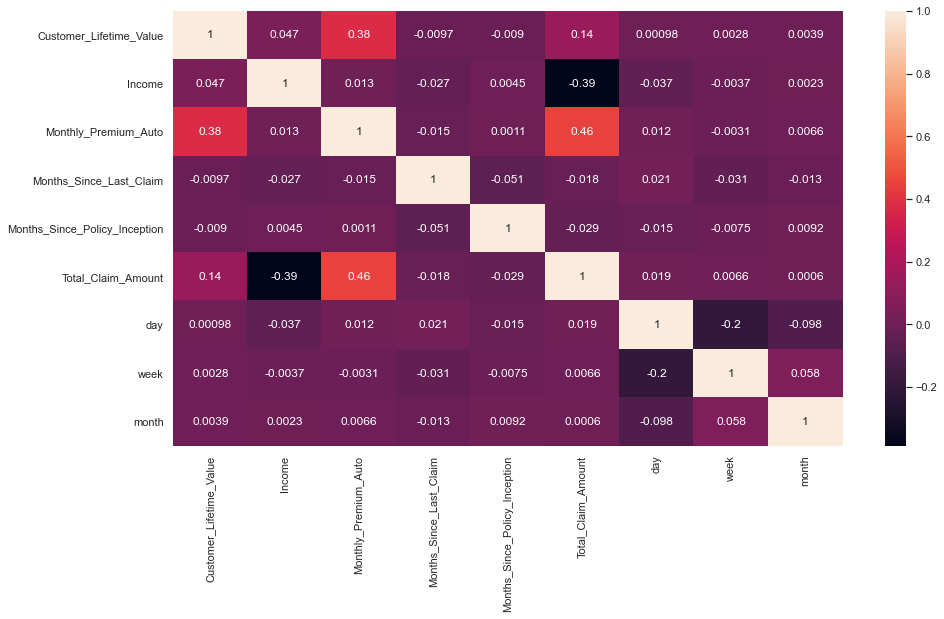

In [74]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(correlations_matr, annot=True)
plt.show()

In [75]:
# I'm going to use different forms to encode the categorical variables, so i must divide it in groups

In [76]:
new_categorical

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size,Open_Complaints,Number_of_Policies
0,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Midsize,Not Open Complains,1
1,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Midsize,Not Open Complains,2
2,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Midsize,Not Open Complains,4+
3,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Midsize,Not Open Complains,1
4,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,L3,Offer2,Web,Two-Door Car,Midsize,Not Open Complains,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,California,No,Premium,College,Employed,F,Suburban,Single,Personal Auto,L2,Offer1,Branch,Four-Door Car,Large,Not Open Complains,1
8121,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Midsize,Not Open Complains,1
8122,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Midsize,Open Complains,2
8123,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large,Not Open Complains,3


In [77]:
one_hot = new_categorical[['State', 'Education', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Number_of_Policies']]

In [78]:
one_hot.dtypes

State                 object
Education             object
Marital_Status        object
Policy_Type           object
Policy                object
Renew_Offer_Type      object
Sales_Channel         object
Vehicle_Class         object
Number_of_Policies    object
dtype: object

In [79]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(one_hot)
print(encoder.categories_)

final_cols = []
for items in encoder.categories_:
    print(items)
    final_cols.extend(items)

encoded = encoder.transform(one_hot).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=final_cols)
onehot_encoded.head()

[array(['Arizona', 'California', 'Oregon', 'Other'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['L1', 'L2', 'L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Other_types', 'SUV', 'Two-Door Car'],
      dtype=object), array(['1', '2', '3', '4+'], dtype=object)]
['Arizona' 'California' 'Oregon' 'Other']
['Bachelor' 'College' 'Doctor' 'High School or Below' 'Master']
['Divorced' 'Married' 'Single']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['L1' 'L2' 'L3']
['Offer1' 'Offer2' 'Offer3' 'Offer4']
['Agent' 'Branch' 'Call Center' 'Web']
['Four-Door Car' 'Other_types' 'SUV' 'Two-Door Car']
['1' '2' '3' '4+']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1

,Arizona,California,Oregon,Other,Bachelor,College,Doctor,High School or Below,Master,Divorced,...,Call Center,Web,Four-Door Car,Other_types,SUV,Two-Door Car,1,2,3,4+
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [80]:
ordinal = pd.DataFrame()
ordinal["Coverage"] = new_categorical["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["Response"] = new_categorical["Response"].map({"No" : 0, "Yes" : 1})
ordinal["EmploymentStatus"] = new_categorical["EmploymentStatus"].map({"Unemployed" : 0, "Employed" : 1})
ordinal["Location_Code"] = new_categorical["Location_Code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
ordinal["Vehicle_Size"] = new_categorical["Vehicle_Size"].map({"Small" : 0, "Midsize" : 1, "Large" : 2})
ordinal["Gender"] = new_categorical["Gender"].map({"F" : 0, "M" : 1})
ordinal["Open_Complaints"] = new_categorical["Open_Complaints"].map({"Not Open Complains" : 0, "Open Complains" : 1})

In [81]:
ordinal

,Coverage,Response,EmploymentStatus,Location_Code,Vehicle_Size,Gender,Open_Complaints
0,0,0,1.0,1,1,0,0
1,2,0,1.0,1,1,0,0
2,0,0,0.0,1,1,1,0
3,0,0,1.0,0,1,1,0
4,0,1,1.0,0,1,0,0
...,...,...,...,...,...,...,...
8120,2,0,1.0,1,2,0,0
8121,1,1,1.0,1,1,0,0
8122,1,0,0.0,1,1,1,1
8123,1,0,1.0,1,2,1,0


In [82]:
final_data = pd.concat([numnor, onehot_encoded, ordinal], axis =1)
final_data

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount,day,week,month,Arizona,...,2,3,4+,Coverage,Response,EmploymentStatus,Location_Code,Vehicle_Size,Gender,Open_Complaints
0,0.050930,0.562847,0.063492,0.914286,0.050505,0.363116,0.766667,0.137255,1.0,0.0,...,0.0,0.0,0.0,0,0,1.0,1,1,0,0
1,0.646658,0.487763,0.373016,0.514286,0.383838,0.534580,0.600000,0.117647,1.0,0.0,...,1.0,0.0,0.0,2,0,1.0,1,1,0,0
2,0.338225,0.000000,0.357143,0.514286,0.656566,0.500043,0.633333,0.039216,0.0,0.0,...,0.0,0.0,1.0,0,0,0.0,1,1,1,0
3,0.053882,0.438443,0.095238,0.342857,0.444444,0.130283,0.066667,0.078431,1.0,0.0,...,0.0,0.0,0.0,0,0,1.0,0,1,1,0
4,0.374145,0.629140,0.063492,0.400000,0.949495,0.150343,0.800000,0.058824,0.0,0.0,...,1.0,0.0,0.0,0,1,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,0.129597,0.477701,0.341270,0.457143,0.585859,0.510804,0.166667,0.000000,0.0,0.0,...,0.0,0.0,0.0,2,0,1.0,1,2,0,0
8121,0.070524,0.216081,0.142857,0.400000,0.282828,0.357820,0.366667,0.098039,1.0,0.0,...,0.0,0.0,0.0,1,1,1.0,1,1,0,0
8122,0.368707,0.000000,0.190476,0.257143,0.373737,0.746301,0.166667,0.078431,1.0,0.0,...,1.0,0.0,0.0,1,0,0.0,1,1,1,1
8123,0.331080,0.219452,0.277778,0.971429,0.030303,0.652306,0.066667,0.078431,1.0,0.0,...,0.0,1.0,0.0,1,0,1.0,1,2,1,0


In [83]:
final_data.dtypes

Customer_Lifetime_Value          float64
Income                           float64
Monthly_Premium_Auto             float64
Months_Since_Last_Claim          float64
Months_Since_Policy_Inception    float64
Total_Claim_Amount               float64
day                              float64
week                             float64
month                            float64
Arizona                          float64
California                       float64
Oregon                           float64
Other                            float64
Bachelor                         float64
College                          float64
Doctor                           float64
High School or Below             float64
Master                           float64
Divorced                         float64
Married                          float64
Single                           float64
Corporate Auto                   float64
Personal Auto                    float64
Special Auto                     float64
L1              

In [84]:
# All the variables are numerical

In [85]:
#Additional question:

In [87]:
data_crosstab = pd.crosstab(new_categorical['Education'], new_categorical['Vehicle_Size'], margins = False)
data_crosstab

Vehicle_Size,Large,Midsize,Small
Education,,,
Bachelor,239,1736,462
College,248,1740,437
Doctor,32,240,44
High School or Below,245,1574,472
Master,83,430,143


In [88]:
import scipy.stats as st
st.chi2_contingency(data_crosstab)

(20.753684293108734,
 0.007831338811797005,
 8,
 array([[ 254.04787692, 1715.648     ,  467.30412308],
        [ 252.79692308, 1707.2       ,  465.00307692],
        [  32.94178462,  222.464     ,   60.59421538],
        [ 238.82793846, 1612.864     ,  439.30806154],
        [  68.38547692,  461.824     ,  125.79052308]]))

In [ ]:
# There is evidence that the education and the vehicle size are NOT independent

In [89]:
data_crosstab1 = pd.crosstab(new_categorical['Location_Code'], new_categorical['Coverage'], margins = False)
data_crosstab1

Coverage,Basic,Extended,Premium
Location_Code,,,
Rural,1019,480,125
Suburban,3116,1521,417
Urban,948,416,83


In [90]:
st.chi2_contingency(data_crosstab1)

(12.650527537701844,
 0.013115840179930715,
 4,
 array([[1015.9744    ,  483.10252308,  124.92307692],
        [3161.7824    , 1503.44836923,  388.76923077],
        [ 905.2432    ,  430.44910769,  111.30769231]]))

In [ ]:
# There is evidence that the coverage and the location code are NOT independent